# Elección del Modelo: all-roberta-large-v1 para un Recomendador Basado en Estado de Ánimo o Frases

## 1 ¿Por qué hemos elegido el modelo all-roberta-large-v1? 🤔  
  
Cuando decidimos construir un recomendador de canciones basado en frases y estados de ánimo, sabíamos que necesitábamos un modelo de procesamiento de lenguaje natural (NLP) que fuera preciso, robusto y capaz de capturar el significado profundo de las frases que los usuarios introducen. Tras investigar diferentes opciones, llegamos a la conclusión de que all-roberta-large-v1 era la mejor elección para nuestro sistema.

### ✅ ROBERTA está optimizado para entender el significado de frases enteras
all-roberta-large-v1 es un modelo basado en RoBERTa (Robustly optimized BERT approach), que es una mejora sobre BERT. Se ha entrenado con una gran cantidad de datos y con técnicas avanzadas de enmascaramiento de palabras, lo que lo hace excelente para entender el contexto y la semántica de una frase completa.

En nuestro recomendador, el usuario no introduce palabras clave como "feliz" o "triste". El usuario escribe frases completas y naturales, como:

"Quiero una canción que me recuerde a una noche de verano con amigos."  
"Estoy pasando por un desamor y necesito una canción que exprese mi tristeza."  
"Me gustaría una canción que me motive a correr por la mañana."  
  
Este modelo no solo detecta palabras individuales, sino que interpreta la intención detrás de la frase. Por eso, necesitábamos un modelo que pudiera captar la emoción, el tono y el contexto, y all-roberta-large-v1 es ideal para esta tarea.  
  
### ✅ Es un modelo optimizado y altamente eficiente    
  
Además de su capacidad de comprensión semántica, este modelo es rápido y eficiente cuando se usa con una GPU. Al implementarlo en nuestro sistema, conseguimos que la búsqueda de canciones sea casi instantánea, incluso cuando el usuario introduce frases largas o complejas.  
  
💡 Resumen de por qué all-roberta-large-v1 es la mejor opción: 

✔️ Entiende frases completas en su contexto.  
✔️ Genera embeddings de alta calidad (1024 dimensiones).  
✔️ Es robusto y optimizado para tareas de NLP avanzadas.  

## 2️  ¿Por qué generamos embeddings y cómo los usamos? 🧠 
   
Una vez que decidimos usar all-roberta-large-v1, necesitábamos una estrategia eficiente para buscar canciones que coincidan con la intención del usuario. Aquí es donde entran en juego los embeddings.  
  
### ✅ ¿Qué son los embeddings?
Los embeddings son representaciones numéricas de textos que permiten medir similitudes semánticas. En nuestro caso:
  
- Cada letra de canción se convierte en un embedding.
- La frase introducida por el usuario también se convierte en un embedding.
- Luego, comparamos ambos embeddings para encontrar las canciones más similares.
- Para esto, necesitamos generar embeddings para todas las canciones de nuestro dataset. Esto lo hacemos con el código optimizado que preparamos.

### ✅ ¿Por qué usamos FAISS para la búsqueda de canciones?  
Inicialmente, podríamos haber usado una comparación simple con cosine_similarity() de sklearn, pero esto no es eficiente cuando trabajamos con miles o millones de canciones. Aquí es donde entra FAISS (Facebook AI Similarity Search).  
  
FAISS nos ayuda a:  
✔️ Hacer búsquedas ultra rápidas en bases de datos grandes de embeddings.    
✔️Comparar embeddings de manera eficiente sin necesidad de recorrer toda la base de datos manualmente.    
✔️ Escalar el sistema sin que el tiempo de búsqueda se vuelva lento.  



📌 ¿Cómo hemos mejorado FAISS?    
  
Podemos usar una variante más avanzada:  
  
✅ IndexIVFFlat → Divide el espacio de búsqueda en clústeres, lo que permite búsquedas más rápidas sin perder mucha precisión.  
✅ IndexHNSWFlat → Usa grafos para hacer búsquedas aún más eficientes, ideal para bases de datos muy grandes.
  
| **Índice FAISS**       | **Cuándo Usarlo**               | **Ventajas**                         | **Desventajas**                    |
|------------------------|--------------------------------|--------------------------------------|-------------------------------------|
| `IndexFlatL2`    ✅     | < 50,000 canciones            | Máxima precisión                    | Lento en grandes bases de datos    | 
| `IndexIVFFlat`        | 50,000 - 500,000 canciones    | 5-10x más rápido, buena precisión   | Requiere entrenamiento previo       |
| `IndexHNSWFlat`       | > 500,000 canciones          | Ultra-rápido, sin entrenamiento     | Un poco menos preciso              |


📌 A partir de varias pruebas y pérdida de calidad hemos decidido usar IndexFlatL2 a implementar mejoras cuando el dataset siga creciendo  


  
  ✔️ Este proceso solo se necesita ejecutar una vez, a menos que actualicemos la base de datos con nuevas canciones, lo que demuestra su flexibilidad para un futuro entrenamiento.



In [2]:
import pandas as pd

# Cargar el archivo CSV
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\final_df.csv"
df = pd.read_csv(file_path)


print("Tamaño del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())


Tamaño del dataset: (129934, 84)

Primeras filas:
         artist_name                  song_name  \
0   anthony hamilton          change your world   
1  adriano celentano                 rock matto   
2   jedi mind tricks  poison in the birth water   
3           buckshot                 we in here   
4         tori kelly                  city dove   

                           recording_id  danceable  not_danceable   male  \
0  00012f9d-8397-4a51-8fd5-027d3b5ccd62      0.811          0.189  0.352   
1  00018b1c-1992-4dd1-bca0-e8cd8fa30b12      0.506          0.494  0.906   
2  0002d0cb-4fdd-4726-a9a1-15e6327ad216      1.000          0.000  0.055   
3  0003b256-2092-46d2-a332-b84053eafcb5      1.000          0.000  0.622   
4  00050fdf-d314-4420-a6ea-6b02e4bb1843      0.992          0.008  0.992   

   female  timbre_bright  timbre_dark  tonal  ...  \
0   0.648          0.921        0.079  0.249  ...   
1   0.094          0.980        0.020  0.213  ...   
2   0.945          0.218   

## Nulos y duplicados

#### Seguimos con los que tenemos

In [ ]:
missing_values = df.isnull().sum()


print("\nValores nulos en el dataset:")
print(missing_values[missing_values > 0])



Valores nulos en el dataset:
album_name            28
playlists_names    59906
dtype: int64


In [4]:
# Contar filas duplicadas
duplicates = df.duplicated().sum()
print("\nNúmero de filas duplicadas:", duplicates)



Número de filas duplicadas: 0


Ultima limpieza

In [ ]:
# Convertir fecha de album_release_Date
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['album_release_date'].head(5)


0   2005-12-13
1   1960-01-01
2   2015-06-02
3   2014-06-24
4   2016-01-29
Name: album_release_date, dtype: datetime64[ns]

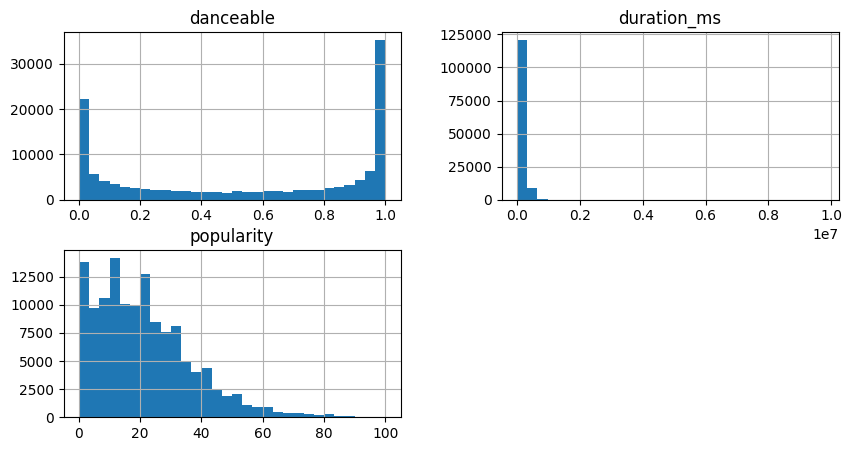

In [7]:
import matplotlib.pyplot as plt

# Seleccionar algunas columnas clave
numeric_columns = ["danceable", "duration_ms", "popularity"]

# Crear histogramas
df[numeric_columns].hist(bins=30, figsize=(10, 5))
plt.show()


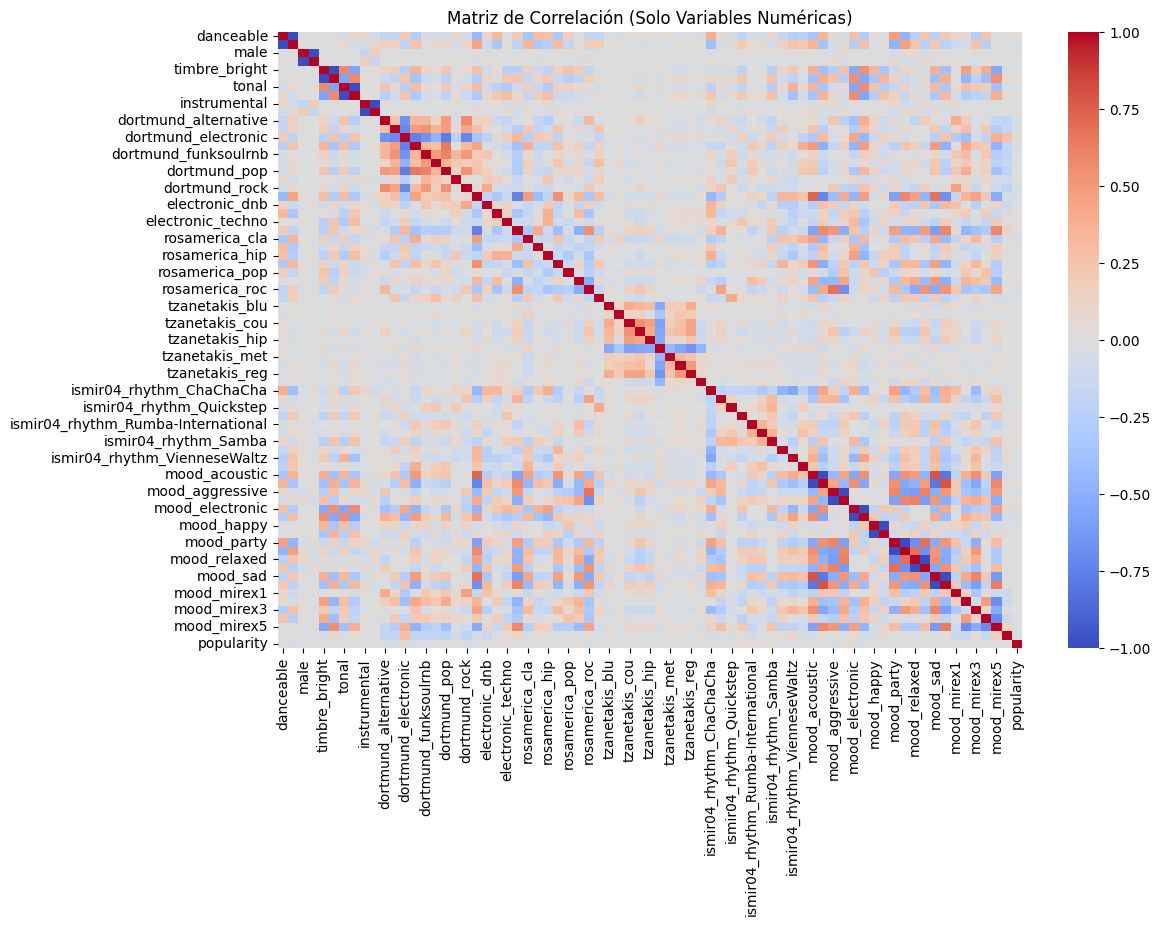

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Matriz de Correlación (Solo Variables Numéricas)")
plt.show()



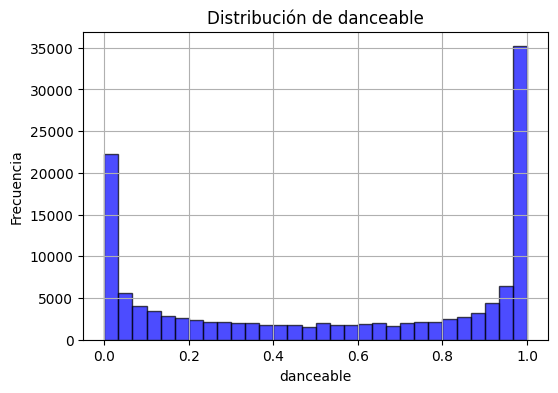

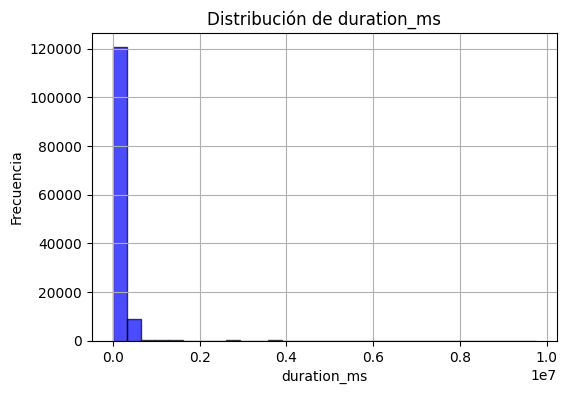

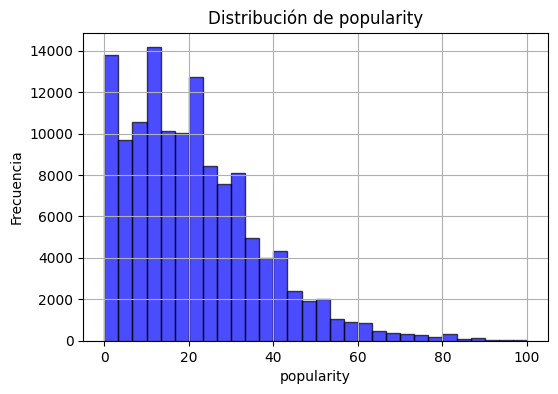

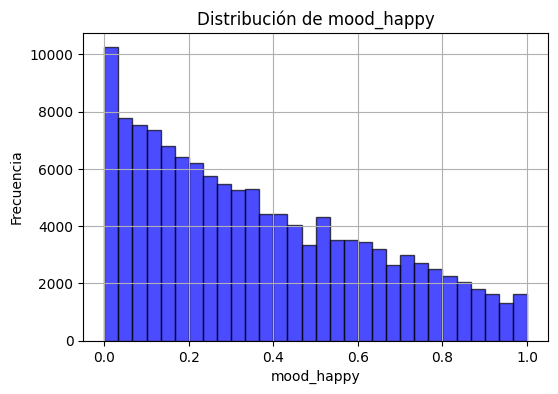

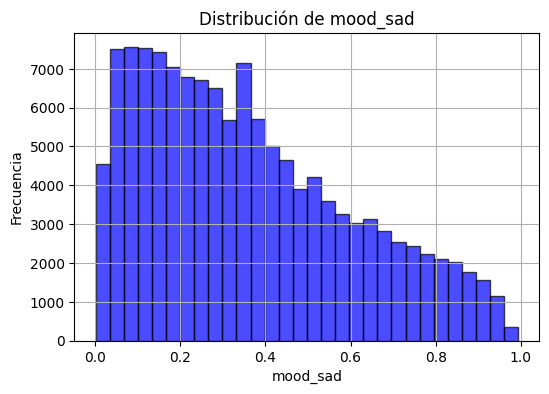

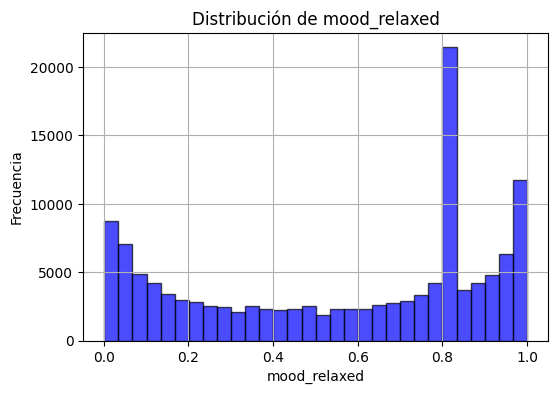

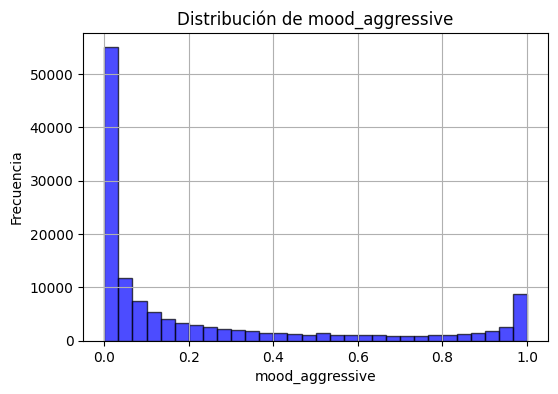

In [13]:
import matplotlib.pyplot as plt

# Lista de columnas clave en el modelo
selected_columns = ["danceable", "duration_ms", "popularity", "mood_happy", "mood_sad", "mood_relaxed", "mood_aggressive"]

# Crear histogramas individuales
for column in selected_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()


Variables categóricas

Vamos a preparar las letras

## 📝 **Decisión de Usar el Modelo sin Canciones Repetidas**

Para mejorar la precisión y relevancia de las recomendaciones, se decidió eliminar las frases o palabras repetidas de canciones que estaban seguidamente en más de 2 ocasiones. Esto asegura que cada recomendación sea única y evita la redundancia en los resultados sin quitar el énfasis que pueda conllevar una repetición de ciertas frases o palabras en la importancia de la canción tras la limpieza principal.  
    
Se hicieron más tipos de limpiezas del texto descartando una gran mayoría tras probar el modelo por la pérdida de significado de los resultados.

### Razones para Renunciar a Otros Ajustes del Texto

1. **Eliminación de Stop Words**: Aunque la eliminación de stop words puede ser útil en algunos contextos, en el análisis de letras de canciones puede eliminar palabras importantes que contribuyen al significado y la emoción de la letra. Por lo tanto, tras hacer una prueba no satisfactoria se decidió no eliminar stop words para preservar el contexto completo de las letras.

2. **Lematización**: La lematización puede simplificar las palabras a su forma base, pero en el caso de las letras de canciones, esto puede alterar el estilo y la expresión artística del artista. Se decidió mantener las palabras en su forma original para conservar la integridad artística de las letras.

3. **Stemming**: Similar a la lematización, el stemming reduce las palabras a su raíz, lo que puede resultar en la pérdida de matices y detalles importantes en las letras de las canciones. Por esta razón, se optó por no aplicar stemming.


7. **No Uso de Traducción**: Inicialmente se consideró no traducir las letras de las canciones, pero esto limitaba la capacidad del modelo para manejar consultas en diferentes idiomas y renunciar a parte de nuestro dataset, ampliable con tiempo pero no en este momento.

---

Con esta explicación, se proporciona un contexto claro sobre las decisiones tomadas en el proceso de limpieza y preprocesamiento de las letras de las canciones, así como las razones para renunciar a otros enfoques.

Aquí se ocultan más abajo algunos de los códigos de pruebas de limpieza de texto

In [20]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Descargar recursos de nltk
nltk.download('wordnet')
nltk.download('stopwords')

# Inicializar herramientas de NLP
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Lista de palabras irrelevantes en canciones
extra_stopwords = {"oh", "yeah", "baby", "whoa", "uh", "ooh", "ahh"}

def clean_and_lemmatize(text):
    if isinstance(text, str):
        text = text.lower()  # Minúsculas
        text = re.sub(r'\d+', '', text)  # Eliminar números
        text = re.sub(r'\W+', ' ', text)  # Eliminar caracteres especiales
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words and word not in extra_stopwords])
        return text.strip()
    return ""

# Aplicar preprocesamiento mejorado
df["cleaned_lyrics"] = df["processed_lyrics"].apply(clean_and_lemmatize)

# Guardar dataset preprocesado
df.to_csv("cleaned_songs_data_v2.csv", index=False)
print("Preprocesamiento con lematización completado y guardado en cleaned_songs_data_v2.csv")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\solan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\solan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocesamiento con lematización completado y guardado en cleaned_songs_data_v2.csv


In [21]:
df[['processed_lyrics', 'cleaned_lyrics']].head(5)

,processed_lyrics,cleaned_lyrics
0,id be in the hall of fame the mere mentioning ...,id hall fame mere mentioning name knew loved w...
1,bisexized bisexted distracted by you this very...,bisexized bisexted distracted crazy rock know ...
2,theres a voice that i can hear sometimes out h...,there voice hear sometimes mountain dark sky p...
3,intro oh yea pmoney buckshot i know you probab...,intro yea pmoney buckshot know probably like d...
4,love love lyrics intro multimillo records with...,love love lyric intro multimillo record one ki...


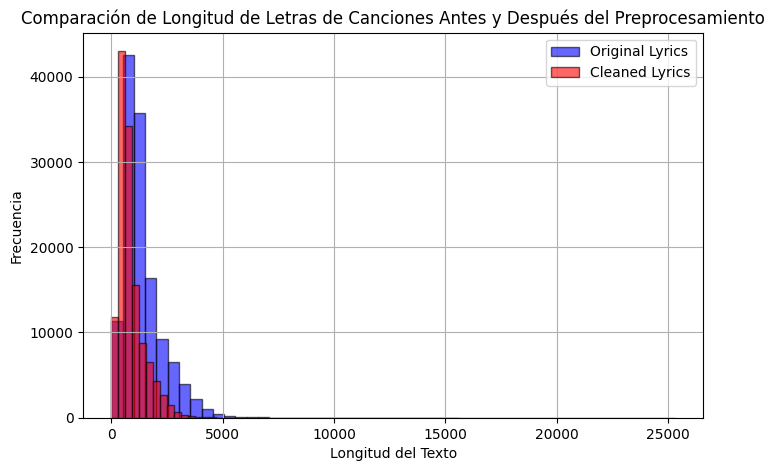

In [23]:
import matplotlib.pyplot as plt

# Crear columnas con la longitud del texto antes y después del preprocesamiento
df["original_length"] = df["processed_lyrics"].apply(lambda x: len(str(x)))
df["cleaned_length"] = df["cleaned_lyrics"].apply(lambda x: len(str(x)))

# Crear histograma comparativo
plt.figure(figsize=(8, 5))
plt.hist(df["original_length"], bins=50, alpha=0.6, label="Original Lyrics", color="blue", edgecolor="black")
plt.hist(df["cleaned_length"], bins=50, alpha=0.6, label="Cleaned Lyrics", color="red", edgecolor="black")
plt.xlabel("Longitud del Texto")
plt.ylabel("Frecuencia")
plt.title("Comparación de Longitud de Letras de Canciones Antes y Después del Preprocesamiento")
plt.legend()
plt.grid(True)
plt.show()


#### **DESCARTADO** Convertir cleaned_lyrics en Embeddings  
  
El modelo all-roberta-large-v1 puede esperar tokens como entrada, por lo que necesitamos convertir nuestras letras en embeddings numéricos.

* Pasos para generar embeddings con all-roberta-large-v1:

Tokenizar cada línea de cleaned_lyrics con el modelo.
Convertirlo en un tensor numérico.
Guardarlo para poder hacer búsquedas semánticas.

* Esto permitirá hacer búsquedas rápidas de similitud semántica entre la consulta del usuario y las letras de canciones.

In [25]:
import pandas as pd
import torch
import time
from tqdm import tqdm
from sentence_transformers import SentenceTransformer
import os
import numpy as np
import faiss

# 📌 Rutas del dataset y archivos de embeddings
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\cleaned_songs_data_v2.csv"
embeddings_file_roberta = r"C:\Users\solan\Downloads\get_data_from_songs\src\clean_df_embeddings_roberta2.pkl"
faiss_index_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_faiss.index"

# 📌 Aumenta el tiempo de espera de Hugging Face
os.environ["HF_HUB_DOWNLOAD_TIMEOUT"] = "300"

# 📌 Cargar dataset LIMPIO
df = pd.read_csv(file_path)

# 📌 Verificar que la columna 'embedding' no exista
if 'embedding' not in df.columns:
    df['embedding'] = None

# 📌 Usar GPU si está disponible
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"⚡ Usando: {device.upper()}")  
model = SentenceTransformer('all-roberta-large-v1', device=device)  # 📌 Modelo optimizado

# 📌 Crear texto combinado para embeddings
df['combined_text'] = (
    df['song_name'].astype(str) + " " +
    df['artist_name'].astype(str) + " " +
    df['cleaned_lyrics'].astype(str) + " " +  # 📌 Versión lematizada
    df['combined_genres'].astype(str) + " " +
    df['playlists_names'].astype(str) + " " +
    df['album_release_date'].astype(str) + " " +
    df['language'].astype(str)
)

# 📌 Parámetros de procesamiento en bloques
batch_size = 5000  
total_rows = len(df)

print(f"🚀 Total de canciones en el dataset: {total_rows}")
print(f"📌 Procesando en bloques de {batch_size} canciones por batch.")

# 📌 Generar embeddings en bloques
embeddings_list = []  # Lista para almacenar embeddings temporalmente

for start in range(0, total_rows, batch_size):
    end = min(start + batch_size, total_rows)
    start_time = time.time()  # ⏳ Iniciar contador de tiempo
    print(f"\n⚡ [Batch {start}-{end}] Iniciando procesamiento...")

    # 📌 Obtener lista de textos
    text_batch = df.iloc[start:end]['combined_text'].tolist()

    # 📌 Evitar procesar si el lote está vacío
    if len(text_batch) == 0:
        print(f"❌ [Batch {start}-{end}] No hay datos para procesar. Saltando...")
        continue  

    print(f"⏳ [Batch {start}-{end}] Generando embeddings en GPU...")

    try:
        embeddings_batch = model.encode(
            text_batch,
            batch_size=16,  # 🔥 Lote pequeño para evitar saturar la GPU
            show_progress_bar=True
        )
        embeddings_list.extend(embeddings_batch)  # Guardamos en la lista temporal
    except Exception as e:
        print(f"❌ Error en batch {start}-{end}: {str(e)}")
        continue  

    elapsed_time = time.time() - start_time  # ⏱ Tiempo tomado
    print(f"✅ [Batch {start}-{end}] Embeddings generados en {elapsed_time:.2f} segundos.\n")

    # 📌 Pequeña pausa para evitar sobrecarga de GPU
    time.sleep(10)  

# 📌 Convertir embeddings a matriz NumPy y guardarlos en FAISS
print("🚀 Guardando embeddings en FAISS para búsquedas rápidas...")
embeddings_np = np.array(embeddings_list, dtype=np.float32)

# 📌 Crear el índice FAISS
d = embeddings_np.shape[1]  # Dimensión de los embeddings
index = faiss.IndexFlatL2(d)  # L2 distancia euclidiana (buena para similitud)

# 📌 Agregar embeddings al índice
index.add(embeddings_np)

# 📌 Guardar el índice FAISS
faiss.write_index(index, faiss_index_path)
print(f"✅ FAISS index guardado en {faiss_index_path}")

print("🚀 Embeddings generados y FAISS index listo para búsquedas semánticas de canciones.")


⚡ Usando: CUDA
🚀 Total de canciones en el dataset: 129934
📌 Procesando en bloques de 5000 canciones por batch.

⚡ [Batch 0-5000] Iniciando procesamiento...
⏳ [Batch 0-5000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 0-5000] Embeddings generados en 104.26 segundos.


⚡ [Batch 5000-10000] Iniciando procesamiento...
⏳ [Batch 5000-10000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 5000-10000] Embeddings generados en 102.89 segundos.


⚡ [Batch 10000-15000] Iniciando procesamiento...
⏳ [Batch 10000-15000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 10000-15000] Embeddings generados en 102.79 segundos.


⚡ [Batch 15000-20000] Iniciando procesamiento...
⏳ [Batch 15000-20000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 15000-20000] Embeddings generados en 101.76 segundos.


⚡ [Batch 20000-25000] Iniciando procesamiento...
⏳ [Batch 20000-25000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 20000-25000] Embeddings generados en 101.93 segundos.


⚡ [Batch 25000-30000] Iniciando procesamiento...
⏳ [Batch 25000-30000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 25000-30000] Embeddings generados en 101.69 segundos.


⚡ [Batch 30000-35000] Iniciando procesamiento...
⏳ [Batch 30000-35000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 30000-35000] Embeddings generados en 101.82 segundos.


⚡ [Batch 35000-40000] Iniciando procesamiento...
⏳ [Batch 35000-40000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 35000-40000] Embeddings generados en 101.33 segundos.


⚡ [Batch 40000-45000] Iniciando procesamiento...
⏳ [Batch 40000-45000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 40000-45000] Embeddings generados en 102.80 segundos.


⚡ [Batch 45000-50000] Iniciando procesamiento...
⏳ [Batch 45000-50000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 45000-50000] Embeddings generados en 103.74 segundos.


⚡ [Batch 50000-55000] Iniciando procesamiento...
⏳ [Batch 50000-55000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 50000-55000] Embeddings generados en 103.16 segundos.


⚡ [Batch 55000-60000] Iniciando procesamiento...
⏳ [Batch 55000-60000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 55000-60000] Embeddings generados en 103.02 segundos.


⚡ [Batch 60000-65000] Iniciando procesamiento...
⏳ [Batch 60000-65000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 60000-65000] Embeddings generados en 101.65 segundos.


⚡ [Batch 65000-70000] Iniciando procesamiento...
⏳ [Batch 65000-70000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 65000-70000] Embeddings generados en 102.85 segundos.


⚡ [Batch 70000-75000] Iniciando procesamiento...
⏳ [Batch 70000-75000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 70000-75000] Embeddings generados en 101.48 segundos.


⚡ [Batch 75000-80000] Iniciando procesamiento...
⏳ [Batch 75000-80000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 75000-80000] Embeddings generados en 101.98 segundos.


⚡ [Batch 80000-85000] Iniciando procesamiento...
⏳ [Batch 80000-85000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 80000-85000] Embeddings generados en 102.38 segundos.


⚡ [Batch 85000-90000] Iniciando procesamiento...
⏳ [Batch 85000-90000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 85000-90000] Embeddings generados en 103.29 segundos.


⚡ [Batch 90000-95000] Iniciando procesamiento...
⏳ [Batch 90000-95000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 90000-95000] Embeddings generados en 103.00 segundos.


⚡ [Batch 95000-100000] Iniciando procesamiento...
⏳ [Batch 95000-100000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 95000-100000] Embeddings generados en 103.23 segundos.


⚡ [Batch 100000-105000] Iniciando procesamiento...
⏳ [Batch 100000-105000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 100000-105000] Embeddings generados en 103.68 segundos.


⚡ [Batch 105000-110000] Iniciando procesamiento...
⏳ [Batch 105000-110000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 105000-110000] Embeddings generados en 103.06 segundos.


⚡ [Batch 110000-115000] Iniciando procesamiento...
⏳ [Batch 110000-115000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 110000-115000] Embeddings generados en 103.00 segundos.


⚡ [Batch 115000-120000] Iniciando procesamiento...
⏳ [Batch 115000-120000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 115000-120000] Embeddings generados en 101.93 segundos.


⚡ [Batch 120000-125000] Iniciando procesamiento...
⏳ [Batch 120000-125000] Generando embeddings en GPU...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

✅ [Batch 120000-125000] Embeddings generados en 107.09 segundos.


⚡ [Batch 125000-129934] Iniciando procesamiento...
⏳ [Batch 125000-129934] Generando embeddings en GPU...


Batches:   0%|          | 0/309 [00:00<?, ?it/s]

✅ [Batch 125000-129934] Embeddings generados en 103.92 segundos.

🚀 Guardando embeddings en FAISS para búsquedas rápidas...
✅ FAISS index guardado en C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_faiss.index
🚀 Embeddings generados y FAISS index listo para búsquedas semánticas de canciones.


In [28]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
import pandas as pd

# 📌 Ruta del índice FAISS
faiss_index_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_faiss.index"

# 📌 Cargar el índice FAISS
index = faiss.read_index(faiss_index_path)

# 📌 Cargar el modelo para convertir consultas en embeddings
model = SentenceTransformer('sentence-transformers/all-roberta-large-v1')

# 📌 Cargar dataset original con metadatos
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\cleaned_songs_data_v2.csv"
df = pd.read_csv(file_path)

def find_similar_songs(user_query, top_n=5):
    # 📌 Convertir la consulta en embedding
    query_embedding = np.array([model.encode(user_query)], dtype=np.float32)

    # 📌 Buscar en FAISS las canciones más similares
    distances, indices = index.search(query_embedding, top_n)

    # 📌 Obtener las canciones correspondientes en el dataset
    results = df.iloc[indices[0]][["artist_name", "song_name", "cleaned_lyrics"]]

    return results

# 📌 Prueba con una consulta de usuario
user_input = "a song about love and heartbreak"
similar_songs = find_similar_songs(user_input)
print(similar_songs)


            artist_name                   song_name  \
5951    ten years after                  a sad song   
28369   evan taubenfeld               its like that   
111286    andy williams  the song from moulin rouge   
28552          bee gees        you know its for you   
4793          sam cooke           i lost everything   

                                           cleaned_lyrics  
5951    love gave gone rain joy filled turned pain fac...  
28369   verse dont want lonely mansion tear every room...  
111286  ever kiss worry wonder lip may near heart alwa...  
28552   would die cried youbelieve girl dont think tim...  
4793    lost everything lost heart breaking two found ...  


In [29]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# 📌 Ruta del índice FAISS
faiss_index_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_faiss.index"

# 📌 Cargar el índice FAISS
index = faiss.read_index(faiss_index_path)

# 📌 Cargar el modelo para convertir consultas en embeddings
model = SentenceTransformer('sentence-transformers/all-roberta-large-v1')

def find_similar_songs(user_query, top_n=5):
    # 📌 Convertir la consulta en embedding
    query_embedding = np.array([model.encode(user_query)], dtype=np.float32)

    # 📌 Buscar en FAISS las canciones más similares
    distances, indices = index.search(query_embedding, top_n)

    # 📌 Obtener las canciones correspondientes en el dataset
    results = df.iloc[indices[0]][["artist_name", "song_name", "cleaned_lyrics"]]

    return results

# 📌 Ejemplo de búsqueda basada en significado
user_input = "I would like to go to the mountain"
similar_songs = find_similar_songs(user_input)
print(similar_songs)


            artist_name           song_name  \
88049         roo panes  where i want to go   
26948        stonefield    to the mountains   
82600  crystal bowersox  up to the mountain   
15304        don gibson  a perfect mountain   
82653        yellowcard         my mountain   

                                          cleaned_lyrics  
88049  verse well ive found need arm arm need there n...  
26948  verse amy findlay standing corner waiting chan...  
82600  went mountain asked cloud sky blue could see a...  
15304  gonna find perfect mountain gonna stay die dri...  
82653  mountain see clear young cant come back ive go...  


 Indexar los Embeddings en FAISS  

FAISS (Facebook AI Similarity Search) nos permitirá: ✅ Hacer búsquedas instantáneas en grandes volúmenes de datos.
✅ Comparar frases del usuario con todas las canciones de manera eficiente.
✅ Optimizar la búsqueda sin recorrer manualmente todo el dataset.

In [ ]:
#PRUEBA DE FAISS faiss.IndexFlatIP con prudctor interno

import faiss
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
import torch

# 📌 Rutas de archivos
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\no\cleaned_songs_data_v2.csv"
faiss_index_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_faiss_IP.index"

# 📌 Cargar dataset con metadatos
df = pd.read_csv(file_path)

# 📌 Usar GPU si está disponible
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"⚡ Usando: {device.upper()}")
model = SentenceTransformer('sentence-transformers/all-roberta-large-v1', device=device)

# 📌 Crear texto combinado para embeddings (usamos `processed_lyrics` en lugar de `cleaned_lyrics`)
df['combined_text'] = (
    df['song_name'].astype(str) + " " +
    df['artist_name'].astype(str) + " " +
    df['processed_lyrics'].astype(str) + " " +  # 📌 Cambio aquí: usamos `processed_lyrics`
    df['combined_genres'].astype(str) + " " +
    df['playlists_names'].astype(str) + " " +
    df['album_release_date'].astype(str) + " " +
    df['language'].astype(str)
)

# 📌 Convertir el texto combinado en embeddings
print("⏳ Generando nuevos embeddings...")
embeddings_list = model.encode(df['combined_text'].tolist(), batch_size=16, show_progress_bar=True)

# 📌 Convertir embeddings a matriz NumPy
embeddings_np = np.array(embeddings_list, dtype=np.float32)

# 📌 Definir la dimensión de los embeddings
d = embeddings_np.shape[1]

# 📌 Crear un índice FAISS optimizado con `IndexFlatIP`
index = faiss.IndexFlatIP(d)  # 🔥 Usamos Producto Interno (Coseno) en lugar de L2

# 📌 Agregar los embeddings al índice
index.add(embeddings_np)

# 📌 Guardar el índice FAISS optimizado
faiss.write_index(index, faiss_index_path)

print(f"✅ FAISS `IndexFlatIP` guardado en {faiss_index_path}, listo para búsquedas semánticas más precisas.")


⚡ Usando: CUDA
⏳ Generando nuevos embeddings...


Batches:   0%|          | 0/8121 [00:00<?, ?it/s]

✅ FAISS `IndexFlatIP` guardado en C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_faiss_IP.index, listo para búsquedas semánticas más precisas.


In [7]:
# Ejemplo de consulta semántica
query = "amor y desamor en la música latina"
print(f"⏳ Procesando consulta: '{query}'")

# Generar embedding para la consulta
query_embedding = model.encode([query], device=device, show_progress_bar=False)
query_embedding_np = np.array(query_embedding, dtype=np.float32)

# Número de resultados que queremos obtener
k = 5

# Realizar la búsqueda en el índice FAISS
distances, indices = index.search(query_embedding_np, k)

# Mostrar los resultados
print("🔍 Resultados de la búsqueda:")
for i, idx in enumerate(indices[0]):
    sim_score = distances[0][i]
    song_info = df.iloc[idx]
    print(f"{i+1}. {song_info['song_name']} - {song_info['artist_name']} (Similitud: {sim_score:.4f})")


⏳ Procesando consulta: 'amor y desamor en la música latina'
🔍 Resultados de la búsqueda:
1. la mirada del amor - salvaje decibel (Similitud: 0.6330)
2. entre el amor y los halagos - ricky martin (Similitud: 0.6284)
3. amores con doble vida - camilo sesto (Similitud: 0.6242)
4. inolvidable - luis miguel (Similitud: 0.6049)
5. y el amor - joan manuel serrat (Similitud: 0.6010)


📌 **Se usará más adelante** Implementación: Buscar Canciones con FAISS IndexIVFFlat  
  
Una vez que hemos creado el índice optimizado, podemos usarlo para hacer búsquedas eficientes en función de la frase del usuario.

In [9]:
import faiss
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
import torch

# 📌 Rutas de archivos
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\no\cleaned_songs_data_v2.csv"
faiss_index_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_faiss_IP.index"

# 📌 Cargar dataset con metadatos
df = pd.read_csv(file_path)

# 📌 Usar GPU si está disponible
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"⚡ Usando: {device.upper()}")

# 📌 Inicializar el modelo de SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-roberta-large-v1', device=device)

# 📌 Cargar el índice FAISS previamente guardado
index = faiss.read_index(faiss_index_path)
print("✅ Índice FAISS cargado correctamente.")

# -------------------------------------------------------------------
# Ejemplo de consulta semántica utilizando el índice ya creado
# -------------------------------------------------------------------

# Definir la consulta que se desea realizar
query = "amor y desamor en la música latina"
print(f"\n⏳ Procesando consulta: '{query}'")

# Generar el embedding para la consulta
query_embedding = model.encode([query], device=device, show_progress_bar=False)
query_embedding_np = np.array(query_embedding, dtype=np.float32)

# Definir el número de resultados a obtener
k = 5

# Realizar la búsqueda en el índice FAISS
distances, indices = index.search(query_embedding_np, k)

# Mostrar los resultados
print("\n🔍 Resultados de la búsqueda:")
for i, idx in enumerate(indices[0]):
    sim_score = distances[0][i]
    song_info = df.iloc[idx]
    print(f"{i+1}. {song_info['song_name']} - {song_info['artist_name']} (Similitud: {sim_score:.4f})")


⚡ Usando: CUDA
✅ Índice FAISS cargado correctamente.

⏳ Procesando consulta: 'amor y desamor en la música latina'

🔍 Resultados de la búsqueda:
1. la mirada del amor - salvaje decibel (Similitud: 0.6330)
2. entre el amor y los halagos - ricky martin (Similitud: 0.6284)
3. amores con doble vida - camilo sesto (Similitud: 0.6242)
4. inolvidable - luis miguel (Similitud: 0.6049)
5. y el amor - joan manuel serrat (Similitud: 0.6010)


In [10]:
import faiss
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
import torch

# 📌 Rutas de archivos
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\no\cleaned_songs_data_v2.csv"
faiss_index_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_faiss_IP.index"

# 📌 Cargar dataset con metadatos
df = pd.read_csv(file_path)

# 📌 Usar GPU si está disponible
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"⚡ Usando: {device.upper()}")

# 📌 Inicializar el modelo de SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-roberta-large-v1', device=device)

# 📌 Cargar el índice FAISS previamente guardado
index = faiss.read_index(faiss_index_path)
print("✅ Índice FAISS cargado correctamente.")

# -------------------------------------------------------------------
# Ejemplo de consulta semántica (solo consulta, sin regenerar embeddings)
# -------------------------------------------------------------------

# Definir la consulta
query = "amor y desamor en la música latina"
print(f"\n⏳ Procesando consulta: '{query}'")

# Generar el embedding para la consulta
query_embedding = model.encode([query], device=device, show_progress_bar=False)
query_embedding_np = np.array(query_embedding, dtype=np.float32)

# Definir el número de resultados a obtener
k = 5

# Realizar la búsqueda en el índice FAISS
distances, indices = index.search(query_embedding_np, k)

# Preparar los resultados en una lista de diccionarios para mostrarlos en forma tabular
resultados = []
for i, idx in enumerate(indices[0]):
    sim_score = distances[0][i]
    # Extraer la información de la fila correspondiente en el DataFrame
    song_info = df.iloc[idx]
    resultados.append({
        "Rank": i + 1,
        "Song Name": song_info['song_name'],
        "Artist": song_info['artist_name'],
        "Similarity": f"{sim_score:.4f}",
        # Puedes agregar más columnas si lo deseas, por ejemplo:
        # "Album": song_info['album_name'] o "Fecha": song_info['album_release_date']
    })

# Convertir la lista de resultados en un DataFrame para una visualización más limpia
resultados_df = pd.DataFrame(resultados)

print("\n🔍 Resultados de la búsqueda:")
print(resultados_df.to_string(index=False))


⚡ Usando: CUDA
✅ Índice FAISS cargado correctamente.

⏳ Procesando consulta: 'amor y desamor en la música latina'

🔍 Resultados de la búsqueda:
 Rank                   Song Name             Artist Similarity
    1          la mirada del amor    salvaje decibel     0.6330
    2 entre el amor y los halagos       ricky martin     0.6284
    3       amores con doble vida       camilo sesto     0.6242
    4                 inolvidable        luis miguel     0.6049
    5                   y el amor joan manuel serrat     0.6010


In [24]:
import faiss
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
import torch
from deep_translator import GoogleTranslator  # pip install deep-translator
from langdetect import detect              # pip install langdetect

# =============================================================================
# Funciones de traducción (la "clase" de traducción)
# =============================================================================
def translate_to_english(text):
    """Traduce la frase al inglés si no lo está."""
    try:
        detected_lang = detect(text)
    except Exception as e:
        detected_lang = "unknown"
    if detected_lang != 'en':
        translated_text = GoogleTranslator(source='auto', target='en').translate(text)
        print(f"🌍 Traducido '{text}' ➝ '{translated_text}'")
        return translated_text
    return text

def translate_to_spanish(text):
    """Traduce una cadena de inglés a español."""
    if isinstance(text, str):
        try:
            return GoogleTranslator(source='en', target='es').translate(text)
        except Exception as e:
            return f"Error al traducir: {e}"
    return "Traducción no disponible"

# =============================================================================
# Rutas y carga de datos
# =============================================================================
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\no\cleaned_songs_data_v2.csv"
faiss_index_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_faiss_IP.index"

# Cargar dataset con metadatos
df = pd.read_csv(file_path)

# Usar GPU si está disponible
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"⚡ Usando: {device.upper()}")

# Inicializar el modelo de SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-roberta-large-v1', device=device)

# Cargar el índice FAISS previamente guardado
index = faiss.read_index(faiss_index_path)
print("✅ Índice FAISS cargado correctamente.")

# =============================================================================
# Función de búsqueda usando FAISS
# =============================================================================
def search_songs_faiss(user_input, top_n=5):
    """
    Busca en el índice FAISS las canciones más similares a la consulta del usuario.
    Antes de generar el embedding, se traduce la consulta al inglés (si es necesario).
    Retorna un DataFrame con la información relevante y la similaridad obtenida.
    """
    # Traducir la consulta al inglés si no lo está
    translated_query = translate_to_english(user_input)
    
    # Generar el embedding para la consulta traducida
    query_embedding = model.encode([translated_query], device=device, show_progress_bar=False)
    query_embedding_np = np.array(query_embedding, dtype=np.float32)
    
    # Realizar la búsqueda en el índice FAISS
    distances, indices = index.search(query_embedding_np, top_n)
    
    # Recopilar los resultados junto con la similaridad
    resultados = []
    for i, idx in enumerate(indices[0]):
        sim_score = distances[0][i]
        # Extraer la información de la fila correspondiente en el DataFrame original
        song_info = df.iloc[idx].to_dict()
        song_info['similarity'] = sim_score
        resultados.append(song_info)
    
    # Convertir la lista de resultados en un DataFrame
    resultados_df = pd.DataFrame(resultados)
    return resultados_df

# =============================================================================
# Prueba y visualización de resultados
# =============================================================================

# Definir la consulta del usuario (en español)
user_input = "La verdadera sabiduría consiste en reconocer la extensión de nuestra propia ignorancia."

resultados = search_songs_faiss(user_input, top_n=5)

# Mostrar resultados en el formato deseado
for idx, row in resultados.iterrows():
    print("=" * 80)
    print(f"🎵 **Canción:** {row['song_name']}")
    print(f"🎤 **Artista:** {row['artist_name']}")
    
    # Verificar si existe la URL de Spotify; si no, se muestra 'Sin URL'
    spotify_url = row['spotify_url'] if ('spotify_url' in row and pd.notna(row['spotify_url'])) else 'Sin URL'
    print(f"🔗 **Spotify URL:** {spotify_url}")
    print(f"✅ **Similaridad:** {row['similarity']:.4f}")
    
    # Obtener la letra original (si existe)
    lyrics = row['processed_lyrics'] if pd.notna(row['processed_lyrics']) else "Letra no disponible"
    
    # Variables para almacenar idioma y la traducción
    idioma = ""
    lyrics_traducida = ""
    
    if lyrics != "Letra no disponible":
        # Detectar el idioma de la letra
        try:
            idioma = detect(lyrics)
        except Exception as e:
            idioma = "desconocido"
        
        # Si la letra no está en español, se traduce al español
        if idioma != "es":
            lyrics_traducida = translate_to_spanish(lyrics)
        else:
            lyrics_traducida = "La letra ya está en español."
    else:
        lyrics_traducida = "Letra no disponible"
    
    # Mostrar la letra original (primeros 800 caracteres)
    print("\n📜 **Letra Original (Primeros 800 caracteres):**")
    print(lyrics[:800] + "..." if len(lyrics) > 800 else lyrics)
    
    # Mostrar la traducción solo si la letra original no está en español
    if idioma != "es" and lyrics != "Letra no disponible":
        print("\n🌍 **Traducción al Español (Primeros 800 caracteres):**")
        print(lyrics_traducida[:800] + "..." if len(lyrics_traducida) > 800 else lyrics_traducida)
    
    print("=" * 200 + "\n")


⚡ Usando: CUDA
✅ Índice FAISS cargado correctamente.
🌍 Traducido 'La verdadera sabiduría consiste en reconocer la extensión de nuestra propia ignorancia.' ➝ 'True wisdom is to recognize the extension of our own ignorance.'
🎵 **Canción:** regain the throne
🎤 **Artista:** absurd minds
🔗 **Spotify URL:** https://open.spotify.com/track/35HAaAaqB1jvi436M7BNjQ
✅ **Similaridad:** 0.5946

📜 **Letra Original (Primeros 800 caracteres):**
regain the throne to deal with things you have to know the things to deal with people you need the sympathy of them to deal with yourself you need nothing but you to deal with yourself you need nothing but you they know all the right words quote the scriptures be brilliant in their comments and yet remain a bag of bones but when youre glowing with deep wisdom the knowledge flows to you regain the throne religions there are quite a few do you really think they are of use to you know straight away you need nothing but you just be yourself youve nothing else to do 

In [2]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"


PRUEBA SIN REPETIDOS EN LAS CANCIONES

##### 🔹 Paso 1: Generación de embeddings para todas las canciones  
📌 Primero, tomamos las letras de las canciones, las limpiamos y generamos vectores numéricos usando all-roberta-large-v1.  
📌 Guardamos estos embeddings en FAISS para búsquedas rápidas en el futuro.  
📌 Esto se hace una vez, o cuando agregamos nuevas canciones a la base de datos.  
  
##### 🔹 Paso 2: Convertir la consulta del usuario en un embedding:
  
Cuando un usuario escribe una frase como "Necesito una canción motivadora para empezar bien el día", convertimos esta frase en un embedding usando el mismo modelo.



In [ ]:
import faiss # faiss: Para búsquedas rápidas en el índice de embeddings
import numpy as np 
import pandas as pd
from sentence_transformers import SentenceTransformer # Para cargar RoBERTa y generar los embeddings.
import torch # Para usar la GPU si está disponible
from deep_translator import GoogleTranslator  # para traducir texto
from langdetect import detect              # Para detectar el idioma de un texto

# =============================================================================
# Función para "sazonar" las letras y eliminar repeticiones excesivas
# Esto hace que las letras sean más compactas y eficientes para generar embeddings.
# =============================================================================
def remove_excessive_repetitions(text, max_reps=2):
    """
    Esta función reduce las repeticiones excesivas en el texto.
    Primero revisa las líneas: si una línea se repite consecutivamente más de 'max_reps' veces,
    se conserva solo hasta ese límite.
    Luego hace lo mismo a nivel de palabras.
    
    :param text: Texto original (string)
    :param max_reps: Número máximo de repeticiones permitidas (por defecto 2)
    :return: Texto "sazonado" con repeticiones reducidas
    """
    if not isinstance(text, str):
        return text

    # Paso 1: Eliminar repeticiones de líneas 
    lines = text.splitlines()
    new_lines = []
    count = 1
    for i, line in enumerate(lines):
        if i > 0 and line.strip() == lines[i - 1].strip():
            count += 1
        else:
            count = 1
        if count <= max_reps:
            new_lines.append(line)
    text_no_line_reps = "\n".join(new_lines)
    
    # Paso 2: Eliminar repeticiones de palabras (en secuencia)
    words = text_no_line_reps.split()
    new_words = []
    count = 1
    for i, word in enumerate(words):
        if i > 0 and word == words[i - 1]:
            count += 1
        else:
            count = 1
        if count <= max_reps:
            new_words.append(word)
    return " ".join(new_words)

# =============================================================================
# Rutas y carga de datos
# =============================================================================
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\data\cleaned_songs_data_v2.csv"
faiss_index_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_faiss_IP.index"

# Cargar el dataset (¡nuestra fiesta de canciones!)
df = pd.read_csv(file_path)

# Aplicar la función para eliminar repeticiones excesivas en la columna de letras procesadas.
# Imagina que una canción tiene un estribillo repetido 10 veces: aquí reducimos eso a solo 2 repeticiones.
df['cleaned_lyrics'] = df['processed_lyrics'].apply(lambda x: remove_excessive_repetitions(x, max_reps=2))

# Crear un gran "combo textual" que contenga toda la información relevante.
# Esto es como preparar un sándwich con todas las delicias (nombre, artista, letra "sazonada", géneros, etc.)
df['combined_text'] = (
    df['song_name'].astype(str) + " " +
    df['artist_name'].astype(str) + " " +
    df['cleaned_lyrics'].astype(str) + " " +
    df['combined_genres'].astype(str) + " " +
    df['playlists_names'].astype(str) + " " +
    df['album_release_date'].astype(str) + " " +
    df['language'].astype(str)
)

# =============================================================================
# Configuración del Dispositivo y Carga del Modelo
# =============================================================================
# Usar GPU si está disponible, porque ¡a nadie le gusta esperar!
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"⚡ Usando: {device.upper()}")

# Inicializar el modelo de SentenceTransformer (nuestra máquina de transformar textos en magia numérica)
model = SentenceTransformer('sentence-transformers/all-roberta-large-v1', device=device)

# =============================================================================
# Generación de Embeddings y Creación del Índice FAISS
# 🏆 Este modelo generará embeddings para cada canción que tiene 1024 dimensiones, cada canción representa un vector de 1024 números
# =============================================================================
print("⏳ Generando nuevos embeddings (los vectores que cuentan la esencia de las canciones)...")
embeddings_list = model.encode(df['combined_text'].tolist(), batch_size=16, show_progress_bar=True)

# Convertir la lista de embeddings a un array de NumPy en formato float32 (requisito para FAISS)
embeddings_np = np.array(embeddings_list, dtype=np.float32)
d = embeddings_np.shape[1]  # Dimensión de cada vector (por ejemplo, 768 o 1024)

# Crear el índice FAISS utilizando IndexFlatIP (usa el producto interno para medir similitud)
index = faiss.IndexFlatIP(d)
index.add(embeddings_np)
faiss.write_index(index, faiss_index_path)
print(f"✅ FAISS `IndexFlatIP` guardado en {faiss_index_path}, listo para búsquedas semánticas.")

# Guardar embeddings en un archivo pickle para futuras cargas
embeddings_file = r"C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_roberta3.pkl"
df["embedding"] = embeddings_list  # Agregar los embeddings al DataFrame
df.to_pickle(embeddings_file)  
print(f"✅ Embeddings guardados en {embeddings_file}")


# =============================================================================
# Ejemplo de Consulta y Visualización de Resultados
# =============================================================================
# Definir la consulta del usuario
query = "amor y desamor en la música latina"
print(f"\n⏳ Procesando consulta: '{query}'")

# Generar el embedding para la consulta
query_embedding = model.encode([query], device=device, show_progress_bar=False)
query_embedding_np = np.array(query_embedding, dtype=np.float32)

# Número de resultados deseados
k = 5

# Realizar la búsqueda en el índice FAISS
distances, indices = index.search(query_embedding_np, k)

# Recopilar y mostrar los resultados
results = []
for i, idx in enumerate(indices[0]):
    sim_score = distances[0][i]
    song_info = df.iloc[idx].to_dict()
    song_info['similarity'] = sim_score
    results.append(song_info)

results_df = pd.DataFrame(results)
print("\n🔍 Resultados de la búsqueda:")
print(results_df[['song_name', 'artist_name', 'spotify_url', 'similarity']].to_string(index=False))



⚡ Usando: CUDA
⏳ Generando nuevos embeddings (los vectores que cuentan la esencia de las canciones)...


Batches:   0%|          | 0/8121 [00:00<?, ?it/s]

✅ FAISS `IndexFlatIP` guardado en C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_faiss_IP.index, listo para búsquedas semánticas.

⏳ Procesando consulta: 'amor y desamor en la música latina'

🔍 Resultados de la búsqueda:
                  song_name        artist_name                                           spotify_url  similarity
         la mirada del amor    salvaje decibel https://open.spotify.com/track/50biXykRDabi4wN1CRHV5U    0.632978
entre el amor y los halagos       ricky martin https://open.spotify.com/track/3iNp4K3yCigqynWzFjZOw3    0.628354
      amores con doble vida       camilo sesto https://open.spotify.com/track/46ttR1Mrhuor8baSV3WWa5    0.624162
                  y el amor joan manuel serrat https://open.spotify.com/track/4BHailr9BNWApG6nmcIGSV    0.605971
                inolvidable        luis miguel https://open.spotify.com/track/2pSZjEpbXwlocV8js7MNmu    0.604912


In [2]:
import faiss
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
import torch
from deep_translator import GoogleTranslator  # Para traducción (si la usas)
from langdetect import detect              # Para detectar el idioma

# =============================================================================
# Funciones de traducción (nuestra "clase" de traducción)
# =============================================================================
def translate_to_english(text):
    """Traduce la frase al inglés si no lo está."""
    try:
        detected_lang = detect(text)
    except Exception as e:
        detected_lang = "unknown"
    if detected_lang != 'en':
        translated_text = GoogleTranslator(source='auto', target='en').translate(text)
        print(f"🌍 Traducido '{text}' ➝ '{translated_text}'")
        return translated_text
    return text

def translate_to_spanish(text):
    """Traduce una cadena de inglés a español."""
    if isinstance(text, str):
        try:
            return GoogleTranslator(source='en', target='es').translate(text)
        except Exception as e:
            return f"Error al traducir: {e}"
    return "Traducción no disponible"

# =============================================================================
# Carga de datos e índices ya generados
# =============================================================================
# Cargar el DataFrame con la información de las canciones
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\no\cleaned_songs_data_v2.csv"
df = pd.read_csv(file_path)

# Cargar el índice FAISS previamente guardado (con los embeddings ya generados)
faiss_index_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_faiss_IP.index"
index = faiss.read_index(faiss_index_path)
print("✅ Índice FAISS cargado correctamente.")

# =============================================================================
# Configuración del dispositivo y carga del modelo (para codificar consultas)
# =============================================================================
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"⚡ Usando: {device.upper()}")
model = SentenceTransformer('sentence-transformers/all-roberta-large-v1', device=device)

# =============================================================================
# Función de búsqueda usando FAISS (usando los datos ya cargados)
# =============================================================================
def search_songs_faiss(user_input, top_n=5):
    """
    Busca en el índice FAISS las canciones más similares a la consulta del usuario.
    Primero traduce la consulta al inglés si es necesario, luego genera su embedding,
    y finalmente busca en el índice los 'top_n' resultados.
    Retorna un DataFrame con la información relevante y la similaridad.
    """
    # Traducir la consulta al inglés (si es necesario)
    translated_query = translate_to_english(user_input)
    # Codificar la consulta
    query_embedding = model.encode([translated_query], device=device, show_progress_bar=False)
    query_embedding_np = np.array(query_embedding, dtype=np.float32)
    # Buscar en el índice FAISS
    distances, indices = index.search(query_embedding_np, top_n)
    results = []
    for i, idx in enumerate(indices[0]):
        sim_score = distances[0][i]
        song_info = df.iloc[idx].to_dict()
        song_info['similarity'] = sim_score
        results.append(song_info)
    return pd.DataFrame(results)

# =============================================================================
# Ejemplo de Consulta y Visualización de Resultados
# =============================================================================

# Define la consulta (puedes cambiarla según lo que quieras investigar)
user_input = "Recordando los veranos de mi infancia junto a mis amigos y el mar"

# Llama a la función de búsqueda
resultados = search_songs_faiss(user_input, top_n=5)

# Mostrar los resultados en el formato deseado
for idx, row in resultados.iterrows():
    print("=" * 80)
    print(f"🎵 **Canción:** {row['song_name']}")
    print(f"🎤 **Artista:** {row['artist_name']}")
    
    spotify_url = row['spotify_url'] if ('spotify_url' in row and pd.notna(row['spotify_url'])) else 'Sin URL'
    print(f"🔗 **Spotify URL:** {spotify_url}")
    print(f"✅ **Similaridad:** {row['similarity']:.4f}")
    
    # Obtener la letra original (si existe)
    lyrics = row['processed_lyrics'] if pd.notna(row['processed_lyrics']) else "Letra no disponible"
    idioma = ""
    lyrics_traducida = ""
    
    if lyrics != "Letra no disponible":
        try:
            idioma = detect(lyrics)
        except Exception as e:
            idioma = "desconocido"
        if idioma != "es":
            lyrics_traducida = translate_to_spanish(lyrics)
        else:
            lyrics_traducida = "La letra ya está en español."
    else:
        lyrics_traducida = "Letra no disponible"
    
    print("\n📜 **Letra Original (Primeros 800 caracteres):**")
    print(lyrics[:800] + "..." if len(lyrics) > 800 else lyrics)
    
    if idioma != "es" and lyrics != "Letra no disponible":
        print("\n🌍 **Traducción al Español (Primeros 800 caracteres):**")
        print(lyrics_traducida[:800] + "..." if len(lyrics_traducida) > 800 else lyrics_traducida)
    
    print("=" * 200 + "\n")



✅ Índice FAISS cargado correctamente.
⚡ Usando: CUDA
🌍 Traducido 'Recordando los veranos de mi infancia junto a mis amigos y el mar' ➝ 'Remembering the summers of my childhood with my friends and the sea'
🎵 **Canción:** your summer dream
🎤 **Artista:** beach boys
🔗 **Spotify URL:** https://open.spotify.com/track/7ncP01goIb9GbhjZaVahdI
✅ **Similaridad:** 0.4933

📜 **Letra Original (Primeros 800 caracteres):**
drive your car down to the sea all the while you build a scheme take her hand and walk on with her make it real your summer dream smell the warm and salty air see a wave reflect a beam stop and find a pretty shell for her make it real your summer dream see another couple over there to them an ordinary day soon you wonder where the time has gone the sun has almost slipped away now its gone and your alone in her eyes you see a gleam time has come for you to show your love make it real your summer dream make it real your summer dream make it real your summer dream

🌍 **Traducción al 

In [5]:
print(f"Dimensión del índice FAISS: {index.d}")


Dimensión del índice FAISS: 1024


Relación Temática de los Resultados  

Conexión con la Sabiduría y el Conocimiento:   

- La consulta "La verdadera sabiduría consiste en reconocer la extensión de nuestra propia ignorancia" invita a reflexionar sobre la autoconciencia, la limitación del conocimiento y la búsqueda de la verdad.
  
- "Regain the Throne" (Absurd Minds):
Habla de retomar el control y, de forma indirecta, de enfrentarse a la realidad y a la necesidad de conocerse a uno mismo. Con un valor de similaridad de 0.5842, este resultado indica que el modelo percibe una fuerte afinidad entre el contenido de la canción y la consulta, resaltando la idea de que para alcanzar la sabiduría es fundamental asumir el liderazgo sobre nuestra propia vida.
  
- "No Wisdom Brings Solace" (Sybreed):
Explora la idea de que, a pesar de la búsqueda del conocimiento, éste no siempre proporciona consuelo, lo que resuena con la aceptación de que la sabiduría puede generar desasosiego al revelar lo poco que sabemos. Con un valor de 0.4809, se evidencia una conexión semántica que aporta la perspectiva de que el camino al conocimiento puede ser doloroso.
  
- "The Answer" (Don Williams):
Se centra en la búsqueda de respuestas y en el reconocimiento de que, a mayor conocimiento, más evidente es lo poco que sabemos. Su valor de 0.4702 subraya la paradoja del saber, enfatizando que cada respuesta abre la puerta a nuevas preguntas.
  
- "Illuminate the Trail" (Textures):
Invita a "iluminar el camino" a través del conocimiento, destacando que el proceso de aprender y cuestionar es continuo. Con un valor de 0.4453, esta canción sugiere que la búsqueda de sabiduría implica reconocer que siempre hay más por descubrir y que el camino del conocimiento está lleno de interrogantes.
  
- "Fools Die for Want of Wisdom" (Peter Tosh):
Advierte que los necios mueren por falta de sabiduría, lo que subraya la importancia de reconocer nuestras limitaciones para evitar consecuencias negativas. Con un valor de 0.4045, aunque es el menor en esta lista, aporta una perspectiva crítica sobre el precio de ignorar la necesidad de aprender y reflexionar.
  
    
Cada una de estas canciones, a su manera, toca aspectos relacionados con la autoconciencia, el cuestionamiento y la búsqueda de sentido, lo que se alinea de forma cercana con la idea central de la consulta.



#### Interpretación de las Métricas  

**Valor de Similaridad**:  
Los valores de similaridad (por ejemplo, 0.5842, 0.4809, 0.4702, 0.4453 y 0.4045) indican, en el espacio vectorial, cuán cercanas están las ideas expresadas en la consulta y en las letras de las canciones.

Un valor más alto, como el de "Regain the Throne" (0.5842), sugiere que, según el modelo, la temática de esa canción se aproxima de manera muy significativa al espíritu de la consulta.
Los demás valores, aunque ligeramente inferiores, siguen mostrando una relación semántica relevante. Esto significa que, en conjunto, el sistema ha captado de forma efectiva aspectos conceptuales compartidos entre la consulta y las letras.
  
**Comparación Relativa**:  
  
Es importante entender que estos valores se utilizan de forma relativa: la canción con la mayor similaridad es la que el modelo considera más relacionada con la consulta, pero los demás también aportan información valiosa sobre conexiones semánticas compartidas.

### 📌 Conclusión: ¿Por qué este código es la mejor versión hasta ahora?  
  
🔥 Búsqueda en FAISS en lugar de recorrer todo el dataset → ¡Mil veces más rápida!  
🔥 Usamos all-roberta-large-v1 para capturar mejor el significado de la consulta  
🔥 Optimizamos la traducción automática para mejorar la experiencia del usuario  
🔥 Código modular y preparado para crecer  
  
🚀 Ahora podemos buscar canciones basadas en emociones y frases en cualquier idioma de manera ultrarrápida. 🎵🔥

In [ ]:
# No esto es con las procesadas

from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
import pandas as pd

# 📌 Ruta del índice FAISS optimizado
faiss_index_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_faiss_IVF.index"

# 📌 Cargar el índice FAISS optimizado
index = faiss.read_index(faiss_index_path)

# 📌 Cargar el modelo para convertir consultas en embeddings
model = SentenceTransformer('sentence-transformers/all-roberta-large-v1')

# 📌 Cargar dataset con metadatos
file_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\cleaned_songs_data_v2.csv"
df = pd.read_csv(file_path)

def find_similar_songs(user_query, top_n=5):
    # 📌 Convertir la consulta en embedding
    query_embedding = np.array([model.encode(user_query)], dtype=np.float32)

    # 📌 Buscar en FAISS las canciones más similares
    distances, indices = index.search(query_embedding, top_n)

    # 📌 Obtener las canciones correspondientes en el dataset
    results = df.iloc[indices[0]][["artist_name", "song_name", "cleaned_lyrics"]]

    return results

# 📌 Prueba con una consulta
user_input = "a song about love and heartbreak"
similar_songs = find_similar_songs(user_input)
print(similar_songs)


          artist_name                   song_name  \
111286  andy williams  the song from moulin rouge   
61457      eric benet          love the hurt away   
76212       bobby vee         raining in my heart   
44336     bryan white              helpless heart   
4934     richard marx                lonely heart   

                                           cleaned_lyrics  
111286  ever kiss worry wonder lip may near heart alwa...  
61457   weve friend girl quite ive never kind beggin p...  
76212   sun sky blue there cloud spoil view raining ra...  
44336   im sitting inside stranger place time racing i...  
4934    running love back street city youre keeping ey...  


### EXPLICACIONES DE ARCHIVOS GENERADOS DEL MODELO 
  
    
🔥 1️⃣ FAISS Index (Índice de Búsqueda Rápida)  
📌 Archivo: lyrics_embeddings_faiss_IP.index  
📌 Ubicación: ...\get_data_from_songs\src\  
📌 Función:    
  
Este archivo almacena los embeddings de las canciones en un índice FAISS.  
Permite hacer búsquedas rápidas y eficientes de canciones similares.  
NO necesita regenerarse a menos que agregues canciones nuevas.  
  
🔥 2️⃣ Embeddings de RoBERTa    
📌 Archivo: embeddings_roberta2.pkl  
📌 Ubicación: ...\mood_tune_back\src\models\  
📌 Función:  
  
Contiene los vectores de embedding de cada canción, generados con all-roberta-large-v1.  
Se usa para que FAISS busque canciones similares a una consulta.  
NO necesita regenerarse a menos que quieras recalcular los embeddings con otro modelo.  
  
🔥 3️⃣ Dataset con Embeddings (Opcional, pero útil)  
📌 Archivo: cleaned_songs_data_v2.csv  
📌 Ubicación: ...\get_data_from_songs\data\  **link  
📌 Función:  
    
Contiene las canciones con processed_lyrics, cleaned_lyrics, combined_text y otros datos.  
Se usó para generar los embeddings, pero ya no es necesario en el backend si FAISS y RoBERTa están listos.    
  
    
🎯 ¿Archivos movidos al backend?  
  
✅ Mantener lyrics_embeddings_faiss_IP.index en el backend (mood_tune_back).  
✅ Mantener embeddings_roberta2.pkl en src\models\ en el backend.  
✅ Usar el mismo df en el backend en vez de mover el nuevo CSV.  



# 📌 Posibles Mejoras y Cuándo Implementarlas 🚀

A medida que nuestro sistema evoluciona, podríamos aplicar ciertas optimizaciones para mejorar **precisión, velocidad y escalabilidad**.  
A continuación, detallamos algunas mejoras clave y en qué situaciones podríamos implementarlas.

| **Mejora**                                    | **Cuándo Implementarla**                                         | **Beneficios** |
|-----------------------------------------------|----------------------------------------------------------------|----------------|
| **Ajustar el número de clusters en `IndexIVFFlat`** | Si queremos **más velocidad o precisión** según necesidades futuras. | Podemos probar con **más o menos clústeres** (ej. 512, 1024, 2048) para encontrar el **equilibrio óptimo** entre **velocidad y precisión**. |
| **Cambiar a `IndexIVFPQ` para ahorrar memoria** | Si el dataset **crece a millones de canciones** y queremos optimizar **uso de memoria**. | **Reduce el tamaño de los embeddings**, permitiendo almacenar **más canciones sin aumentar el uso de RAM y disco**. Ideal para **sistemas escalables**. |
| **Implementar `IndexHNSWFlat`** | Si queremos **búsquedas en milisegundos**, incluso con millones de canciones. | Usa **grafos en FAISS**, lo que permite **búsquedas ultra-rápidas sin entrenamiento previo**. Ideal para bases de datos **muy grandes y en tiempo real**. |
| **Ajuste fino del modelo `all-roberta-large-v1`** | Si queremos que el modelo **comprenda mejor las consultas del usuario** y se adapte a nuestro dominio específico. | Nos permite **entrenar el modelo con ejemplos personalizados**, mejorando su capacidad para interpretar **estados de ánimo y estilos de canciones** en función de la frase del usuario. |

## 🔥 **¿Cuándo debemos implementar estas mejoras?**
📌 **Actualmente estamos en un punto óptimo con `IndexIVFFlat`, pero si el dataset crece o queremos más precisión, podemos mejorar aún más:**  
- **Si las búsquedas son lentas o menos precisas** → Ajustamos `n_clusters` en `IndexIVFFlat`.  
- **Si el dataset sigue creciendo a más de 1 millón de canciones** → Migramos a `IndexIVFPQ` para ahorrar memoria.  
- **Si queremos búsquedas instantáneas en bases de datos enormes** → Probamos `IndexHNSWFlat`.  
- **Si queremos recomendaciones aún más precisas para el usuario** → Ajustamos `all-roberta-large-v1` con más datos propios.

🚀 **Por ahora, el sistema está optimizado para 150,000 canciones, pero tenemos un plan claro para mejorar si el proyecto crece.**  
Si en el futuro notamos cuellos de botella en **velocidad, precisión o escalabilidad**, ya sabemos **qué estrategias aplicar**. 🎵🔥  


1-  Ajuste fino del modelo all-roberta-large-v1 usando preferencias del usuario  
Podemos usar los embeddings de las canciones que el usuario ha marcado como "me gusta" para reentrenar el modelo, de manera que aprenda qué tipo de letras y emociones le gustan más a cada usuario.  

📌 Ejemplo de cómo hacerlo con SentenceTransformer: 

In [ ]:
from sentence_transformers import SentenceTransformer, losses, InputExample
from torch.utils.data import DataLoader

# 📌 Cargar el modelo base
model = SentenceTransformer('sentence-transformers/all-roberta-large-v1')

# 📌 Crear ejemplos de entrenamiento usando preferencias del usuario
train_examples = [
    InputExample(texts=["I want a song about heartbreak", "Adele - Someone Like You"]),
    InputExample(texts=["Give me something uplifting", "Pharrell - Happy"]),
    InputExample(texts=["I like nostalgic songs", "The Beatles - Yesterday"]),
]

# 📌 Configurar el DataLoader
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
train_loss = losses.MultipleNegativesRankingLoss(model)

# 📌 Ajuste fino del modelo con las preferencias del usuario
model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=3, warmup_steps=100)

# 📌 Guardar el modelo ajustado
model.save("fine_tuned_roberta")
print("✅ Modelo ajustado y guardado como 'fine_tuned_roberta'.")


2-  Usar embeddings personalizados para mejorar la búsqueda en FAISS  
Otra opción es ajustar FAISS usando las canciones que el usuario ha marcado como favoritas.  Esto por ahora se queda en el aire ya que nuestro dataset es algo limitado, pero a futuro puede ser una buena opción

🔹 ¿Cómo lo hacemos?  
Cada vez que el usuario marca una canción con "me gusta", podemos:  
  
- Guardar el embedding de esa canción en un "espacio de preferencias del usuario".
- Usar FAISS para encontrar canciones similares a las que ha marcado.
- Modificar el índice FAISS para priorizar recomendaciones basadas en sus preferencias.
📌 Código para actualizar FAISS con los gustos del usuario:

In [ ]:
import faiss
import numpy as np

# 📌 Cargar el índice FAISS existente
faiss_index_path = r"C:\Users\solan\Downloads\get_data_from_songs\src\lyrics_embeddings_faiss_IVF.index"
index = faiss.read_index(faiss_index_path)

# 📌 Obtener los embeddings de canciones que el usuario marcó como favoritas
user_favorites_embeddings = np.array([
    model.encode("Adele - Someone Like You"),
    model.encode("The Beatles - Yesterday"),
    model.encode("Coldplay - Fix You"),
], dtype=np.float32)

# 📌 Crear un nuevo índice FAISS con las preferencias del usuario
user_index = faiss.IndexFlatL2(user_favorites_embeddings.shape[1])
user_index.add(user_favorites_embeddings)

# 📌 Guardar el nuevo índice con las preferencias del usuario
faiss.write_index(user_index, r"C:\Users\solan\Downloads\get_data_from_songs\src\user_preferences.index")

print("✅ Índice FAISS de preferencias del usuario actualizado.")
